Text(0, 0.5, 'Intensity')

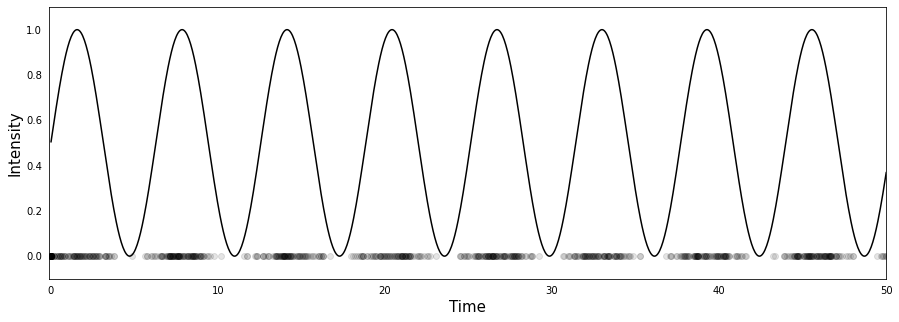

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np

intensity_equation = lambda t: 0.5*np.sin(t)+0.5
plt.figure(figsize=[15,5])


def integral_equation(t,t_prev):
    return 1-np.exp(0.5*(np.cos(t)-np.cos(t_prev)+t_prev-t)) 

for i in range(30): 
    T=[0]
    Depth=[0]
    threshold=1
    lam=0.5
    r=50
    while T[-1]<r:
        p=sp.uniform.rvs(size=1)[0]

        t=0
        while integral_equation(T[-1]+t,T[-1])<p:
            t+=0.01
            if t>r:
                t=r
                break
        T.append(T[-1]+t)
        Depth.append(sp.uniform.rvs(size=1)[0]*0.2)

    plt.plot(T,np.zeros(len(T)),'o',color='black',alpha=0.1)

    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)


x=np.linspace(0.01,r,1000)
plt.plot(x,[intensity_equation(t) for t in x],'black')

plt.axis([-0.1,50,-0.1,1.1])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

#plt.savefig('sinusoidal_PP.pdf')